In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

In [2]:
from scipy.io import loadmat

In [3]:
infile=loadmat('ex6data1.mat')

In [5]:
infile.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [27]:
X=infile['X'].copy()
y=infile['y'].copy()

In [7]:
X.shape,y.shape

((51, 2), (51, 1))

In [8]:
np.unique(y)

array([0, 1], dtype=uint8)

In [64]:
pos=np.where(y==1)
neg=np.where(y==0)

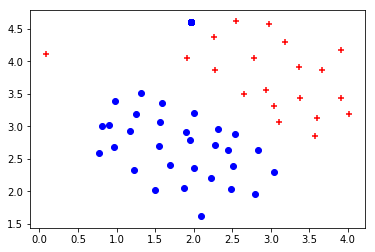

In [65]:
plt.scatter(X[pos,0],X[pos,1],marker='+',color='r')
plt.scatter(X[neg,0],X[neg,1],marker='o',color='b')

In [17]:
svm_lowC=svm.SVC(kernel='linear',C=1).fit(X,y.ravel())

In [43]:
w=svm_lowC.coef_[0]
a=-w[0]/w[1]

In [44]:
b=-svm_lowC.intercept_/w[1]

In [45]:
z=np.linspace(0,5)

In [46]:
y.shape

(51, 1)

In [47]:
z.shape

(50,)

In [50]:
z_lowC=a*z+b

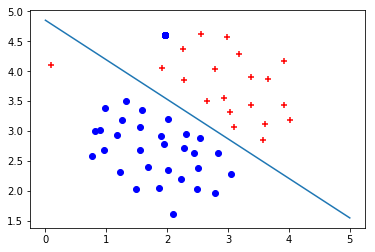

In [53]:
plt.plot(z,z_lowC)
plt.scatter(X[pos,0],X[pos,1],marker='+',color='r')
plt.scatter(X[neg,0],X[neg,1],marker='o',color='b')

In [60]:
svm_highC=svm.SVC(kernel='linear',C=100).fit(X,y.ravel())

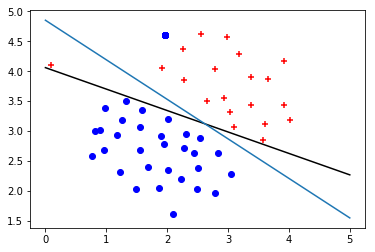

In [66]:
w2=svm_highC.coef_[0]
a2=-w2[0]/w2[1]
b2=-svm_highC.intercept_/w2[1]
z_highC=a2*z+b2
plt.plot(z,z_highC,color='k')
plt.plot(z,z_lowC)
plt.scatter(X[pos,0],X[pos,1],marker='+',color='r')
plt.scatter(X[neg,0],X[neg,1],marker='o',color='b')

In [68]:
def GaussianKernel(x1,x2,sigma):
    g=-((x1-x2)**2).sum()/(2*sigma**2)
    return np.exp(g)

In [69]:
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2
GaussianKernel(x1,x2,sigma)

0.32465246735834974

In [70]:
infile2=loadmat('ex6data2.mat')

In [94]:
infile2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [95]:
X2=infile2['X'].copy()
y2=infile2['y'].copy()

In [96]:
np.unique(y2)

array([0, 1], dtype=uint8)

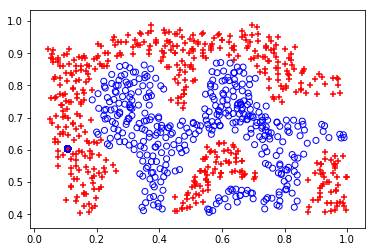

In [101]:
pos2=np.where(y2==1)
neg2=np.where(y2==0)
plt.scatter(X2[pos2,0],X2[pos2,1],marker='+',color='r')
plt.scatter(X2[neg2,0],X2[neg2,1],marker='o',color='b',facecolor='none')

In [110]:
gamma=np.power(0.1,-2)
svm.gau=svm.SVC(kernel='rbf',C=1,gamma=gamma).fit(X2,y2.ravel())

In [115]:
x_min=X2[:,0].min()
x_max=X2[:,0].max()
y_min=X2[:,1].min()
y_max=X2[:,1].max()
x_lin=np.linspace(x_min,x_max,100)
y_lin=np.linspace(y_min,y_max,100)
xx,yy=np.meshgrid(x_lin,y_lin)
z=svm.gau.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape((len(x_lin),len(y_lin)))

In [114]:
xx.shape,yy.shape

((100, 100), (100, 100))

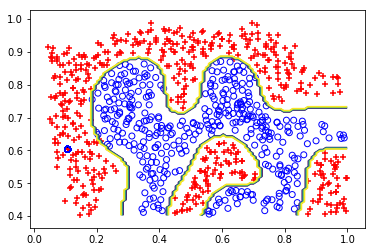

In [117]:
plt.contour(x_lin,y_lin,z)
pos2=np.where(y2==1)
neg2=np.where(y2==0)
plt.scatter(X2[pos2,0],X2[pos2,1],marker='+',color='r')
plt.scatter(X2[neg2,0],X2[neg2,1],marker='o',color='b',facecolor='none')

In [118]:
infile3=loadmat('ex6data3.mat')

In [120]:
infile3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [122]:
X3=infile3['X']
y3=infile3['y']
Xval=infile3['Xval']
yval=infile3['yval']

In [126]:
Cvalues = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigmavalues = Cvalues
gammavalues=np.power(sigmavalues,-2.)
bestpair=(0,0)
bestscore=0
for C in Cvalues:
    for gamma in gammavalues:
        svm_mod=svm.SVC(kernel='rbf',C=C,gamma=gamma).fit(X3,y3.ravel())
        currentscore=svm_mod.score(Xval,yval)
        if currentscore > bestscore:
            bestscore=currentscore
            bestpair=(C,gamma)

        

In [127]:
bestpair

(0.3, 99.999999999999986)

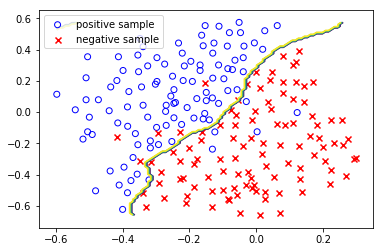

In [160]:
pos=X3[(y3==1).ravel()]
neg=X3[(y3==0).ravel()]
plt.scatter(pos[:,0],pos[:,1],marker='o',facecolor='none',color='b',label='positive sample')
plt.scatter(neg[:,0],neg[:,1],marker='x',color='r',label='negative sample')
x_min=X3[:,0].min()
x_max=X3[:,0].max()
y_min=X3[:,1].min()
y_max=X3[:,1].max()
xlin=np.linspace(x_min,x_max,100)
ylin=np.linspace(y_min,y_max,100)
xx,yy=np.meshgrid(xlin.ravel(),ylin.ravel())
gau_svm=svm.SVC(kernel='rbf',C=bestpair[0],gamma=bestpair[1]).fit(X3,y3.ravel())
z=gau_svm.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape((len(xlin),len(ylin)))
plt.contour(xlin,ylin,z)
plt.legend()

In [151]:
xlin.ravel().shape

(100,)

In [140]:
X3[0]

array([-0.158986,  0.423977])